In [1]:
import sklearn
import pickle
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
with open('logistic-regression-data.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
clf = LogisticRegression(random_state=5000).fit(data["training_x"], data["training_y"])

In [4]:
preds_training = clf.predict_proba(data["training_x"])
preds_validations = clf.predict_proba(data["validation_x"])

In [5]:
def plot_hist(ground_truth, preds, is_training):
    preds = preds[:,-1]
    preds_true = []
    preds_false = []
    for val, i in enumerate(preds):
        if ground_truth[i]:
            preds_true.append(preds[i])
        else:
            preds_false.append(preds[i])
    
    plt.hist(preds_true, bins=10, label='True')
    plt.hist(preds_false, bins=10, label='False')
    plt.legend(loc='best')
    plt.ylabel('Count')
    plt.xlabel('Predicted Probability')
    if is_training:
        plt.title('Training Data')
    else:
        plt.title('Validation Data')

    plt.show()

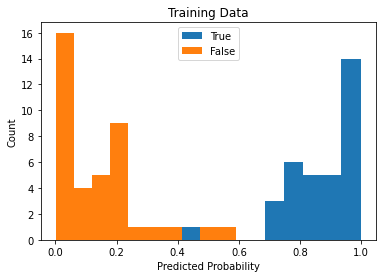

In [30]:
plot_hist(data["training_y"], preds_training, True)

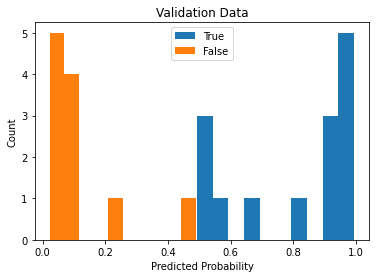

In [32]:
plot_hist(data["validation_y"], preds_validations, False)